# Create a table that contains the ion densities calculated by CMFGen 
from the POP files.  The routine assumes the POP files are all in a
specific directory

The POP files format is not very well explained in the documentation, and parsing it is not straight forward because the bit os information are not documeented in the documentation.  

In particular, there are a set of lines that come after a line that contains the word Oscilator.  These contain the densities of the level populations of a particular ion as a function of grid cell.  The last n numbers, where n is the number of cells, contains the total densities for that ion.  The organization of the population of the individual levels is not specified in the documention, and is something ksl has not fully worked out.  It seems not to be that one can simply take the first n elements and assume that this is the ion density of the first level.

The densities that are obtained by this routine go from the outside of the wind to the photosphere.

In [4]:
from glob import glob
from astropy.table import Table,vstack,join
import matplotlib.pyplot as plt
import numpy as np
import os
os.getcwd()

'/Users/matthewsj/winds/release-models/Details/cmfgen/cmfgen'

In [5]:
def get_den_for_one_atom(filename='a3/POPHYD',outroot=''):
    z=open(filename)
    lines=z.readlines()
    xabun=False
    xpop=False
    xnum=False
    record_abun=[]
    record_pop=[]
    pop_stack=[]
    nd=0
    nden=[]
    nlev=[]
    xlabel=[]
    i=0
    for line in lines:
        word=line.split()
        try:
            xline=[]
            for one_word in word:
                xline.append(eval(one_word))
            xnum=True
        except:
            xnum=False
        if xnum==True and xabun==True:
            record_abun+=xline
        elif xnum==True and xpop==True:
            record_pop+=xline
        
        
        if word[0]=='ND:':
            nd=int(word[1])
        if word[1]=='abundance:':
            atom=word[0].split('/')[0]
            print(atom)
            xabun=True
            xpop=False
            record_abun=[]
        elif word[0]=='Number':
            nlev.append(int(word[4]))
            xlabel.append(word[2])
        elif word[1]=='Oscillator':
            nden.append(i+1)
            xpop=True
            xabun=False
            if len(record_pop)>0:
                record_pop=np.array(record_pop)
                pop_stack.append(record_pop)
            record_pop=[]
 
            
        
        i+=1

    if len(record_pop)>0:
        record_pop=np.array(record_pop)
        pop_stack.append(record_pop)
    print('ND ', nd)
    print('nden: ',nden)
    print('nlev: ',nlev)
    print(len(record_abun),len(record_pop),len(pop_stack))

    qnum=range(len(record_abun))
    abun_tab=Table([qnum,record_abun],names=['n',atom])

    i=0
    for one in pop_stack:
        xden=one[-nd:]
        xtab=Table([qnum,xden],names=['n',xlabel[i]])
        if i==0:
            xfinal=join(abun_tab,xtab,join_type='left')
        else:
            xfinal=join(xfinal,xtab,join_type='left')
        # xfinal.append(one[-nd:])
        i+=1
        

    if outroot=='':
        outroot='test'

    outname='%s.%s.txt' % (outroot,atom)

    xfinal.write(outname,format='ascii.fixed_width_two_line',overwrite=True)
    
    return xfinal

In [12]:
xfinal=get_den_for_one_atom(filename='a3/POPHE',outroot='a3')
xfinal=get_den_for_one_atom(filename='a3/POPCARB',outroot='a3')
xfinal=get_den_for_one_atom(filename='a3/POPHYD',outroot='a3')

HE
ND  52
nden:  [13, 315]
nlev:  [45, 30]
52 1612 2
CARB
ND  52
nden:  [13, 113, 473]
nlev:  [14, 54, 18]
52 988 3
HYD
ND  52
nden:  [13]
nlev:  [30]
52 1612 1


In [13]:
xfinal=get_den_for_one_atom(filename='a2/POPHE',outroot='a2')
xfinal=get_den_for_one_atom(filename='a2/POPHYD',outroot='a2')
xfinal=get_den_for_one_atom(filename='a2/POPCARB',outroot='a2')

HE


IndexError: list index out of range

[]

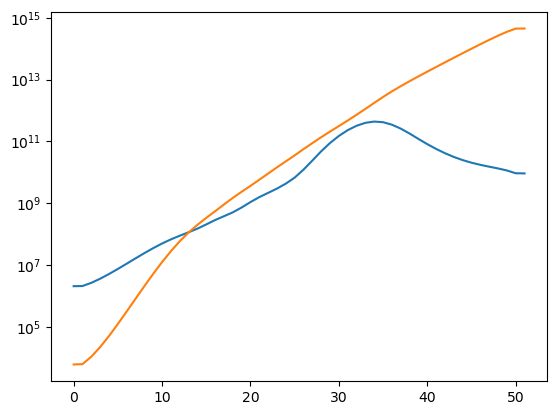

In [11]:
import astropy.io.ascii as io
data = io.read("a2.HE.txt")
plt.plot(data["n"], data["HeI"])
plt.plot(data["n"], data["He2"])
plt.semilogy()

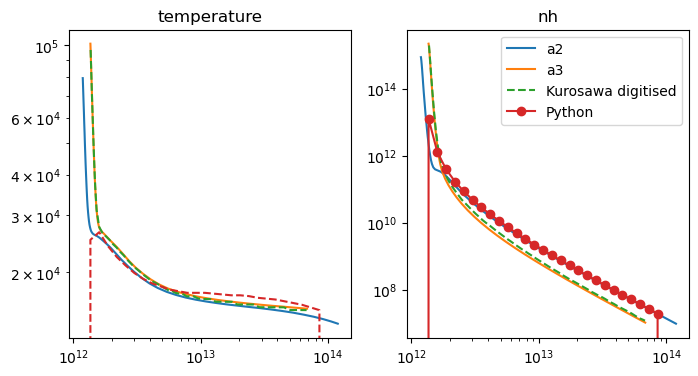

In [100]:
import astropy.io.ascii as io

plt.figure(figsize=(8,4))
plt.subplot(121)
data = io.read("a2.rvtj.txt")
plt.plot(data["r"], data["T"], label="a2")
data = io.read("a3.rvtj.txt")
plt.plot(data["r"], data["T"], label="a3")
#plt.plot(data["n"], data["He2"])
r,t = np.genfromtxt("t_kuro.dat", unpack=True)
plt.plot(r*data["r"][0], t*1e4, ls="--", label="Kurosawa digitised")
plt.loglog()
plt.title("temperature")

data2 = io.read("/Users/matthewsj/winds/release-models/Details/cmfgen/python/jm_runs/a2_fudge_he.master.txt")
plt.plot(data2["r"],data2["t_e"], ls="--", label="Python")

plt.subplot(122)
data = io.read("a2.rvtj.txt")
plt.plot(data["r"], data["nh"], label="a2")
data = io.read("a3.rvtj.txt")
plt.plot(data["r"], data["nh"], label="a3")
#plt.plot(data["n"], data["He2"])
r,n = np.genfromtxt("rho_kuro.dat", unpack=True)
plt.plot(r*data["r"][0], n, ls="--", label="Kurosawa digitised")
plt.loglog()

plt.plot(data2["r"],data2["ne"], "-o", label="Python")


plt.title("nh")
plt.legend()
plt.savefig("/Users/matthewsj/Downloads/nh-temp-cmfgen-kuro.png", dpi=200)

(1e-12, 2)

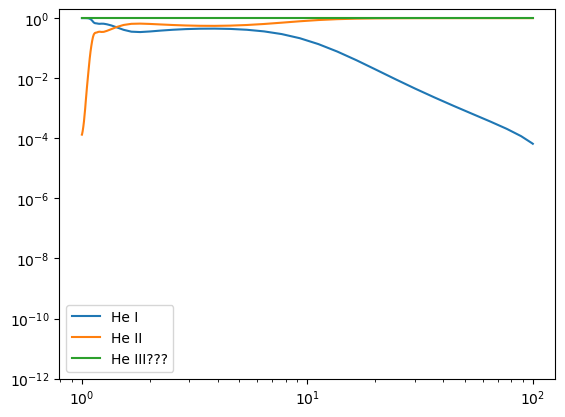

In [98]:
data = io.read("a2.rvtj.txt")
x = np.genfromtxt("a2_he1.txt")
total1 = x[2]
plt.plot(data["r"]/data["r"][0], x[0]/total1, label="He I")
plt.plot(data["r"]/data["r"][0], x[1]/total1, label="He II")
plt.plot(data["r"]/data["r"][0], x[2]/total1, label="He III???")
plt.loglog()
plt.legend()
plt.ylim(1e-12,2)